In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import keras as kr
import math
import datetime
import pickle
import tqdm
import seaborn as sns
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
sns.set_style("darkgrid")
colors = sns.color_palette("Set2")
plt.rcParams["font.family"] = ["Microsoft JhengHei"]
#plt.rcParams["font.sans-serif"] = ["KaiTi"]
#plt.rcParams["font.serif"] = ["KaiTi"]
plt.rcParams["axes.unicode_minus"] = False
pd.set_option("display.max_rows",1600)
pd.set_option("display.max_columns",2000)


df4=pd.read_csv(r'C:\Users\akari\buildings_cleaned1.csv',encoding ="utf-8")
ddf_new=pd.read_csv(r'C:\Users\akari\真誘卵桶卵粒數統計+天氣(里)+補里的缺失值+cdc(里)+到11月.csv',encoding ="utf-8")


## 實作(天氣+地理資料)

In [2]:
ddf_new=pd.read_csv(r'C:\Users\akari\真誘卵桶卵粒數統計+天氣(里)+補里的缺失值+cdc(里)+到11月.csv',encoding ="utf-8")

In [208]:
#只到9月則需要執行這格，到11月不用
ddf_new=ddf_new[:9485]

In [209]:
#合成天氣地理資料
df_merge=pd.merge(ddf_new,df4,on=['DIST',"VILL"],how='inner')
df_merge.sort_values(by=["WeekName",'DIST',"VILL"],inplace=True,ignore_index=True)

In [116]:
df_merge

,DIST,VILL,POSITIVE_NUM,測站氣壓,氣溫,最高氣溫,最低氣溫,相對溼度,最小相對溼度,風速,風向(360degree),降水量,WeekName,案例數,"('屋齡', 'max')","('屋齡', 'mean')","('屋齡', 'median')","('樓高_int', 'max')","('樓高_int', 'mean')","('樓高_int', 'median')",住宅大樓(11層含以上有電梯),公寓(5樓含以下無電梯),華廈(10層含以下有電梯),透天厝
0,中西區,五條港里,1,1017.885714,18.957143,23.057143,16.528571,82.000000,65.714286,3.628571,110.000000,0.071429,1,0,62,34.884615,33.0,10.0,4.961538,5.0,0.000000,0.153846,0.423077,0.423077
1,中西區,光賢里,2,1017.885714,18.957143,23.057143,16.528571,82.000000,65.714286,3.628571,110.000000,0.071429,1,0,47,19.735294,20.5,15.0,7.176471,5.0,0.352941,0.000000,0.205882,0.441176
2,中西區,兌悅里,2,1017.885714,18.957143,23.057143,16.528571,82.000000,65.714286,3.628571,110.000000,0.071429,1,0,55,22.750000,27.0,17.0,4.375000,3.5,0.125000,0.020833,0.333333,0.520833
3,中西區,南廠里,1,1017.885714,18.957143,23.057143,16.528571,82.000000,65.714286,3.628571,110.000000,0.071429,1,0,56,32.806452,36.0,12.0,5.258065,5.0,0.129032,0.096774,0.290323,0.483871
4,中西區,南美里,1,1017.885714,18.957143,23.057143,16.528571,82.000000,65.714286,3.628571,110.000000,0.071429,1,0,82,31.285714,38.0,10.0,6.285714,5.0,0.000000,0.095238,0.500000,0.404762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8885,永康區,西勢里,5,1005.171429,26.914286,30.157143,24.971429,91.285714,76.428571,3.685714,154.285714,59.285714,36,1,42,17.782609,27.0,7.0,3.956522,4.0,0.000000,0.130435,0.173913,0.695652
8886,永康區,西橋里,3,1005.171429,26.914286,30.157143,24.971429,91.285714,76.428571,3.685714,154.285714,59.285714,36,7,42,34.409091,35.0,9.0,4.863636,5.0,0.000000,0.318182,0.318182,0.363636
8887,永康區,西灣里,4,1005.171429,26.914286,30.157143,24.971429,91.285714,76.428571,3.685714,154.285714,59.285714,36,6,42,22.666667,29.0,9.0,5.238095,4.0,0.000000,0.000000,0.452381,0.547619
8888,永康區,龍埔里,7,1005.171429,26.914286,30.157143,24.971429,91.285714,76.428571,3.685714,154.285714,59.285714,36,0,40,11.483871,7.0,13.0,7.935484,7.0,0.387097,0.032258,0.225806,0.354839


In [210]:
ddf_new=df_merge

In [ ]:
#下面添加的要幾周內的甚麼特徵都可以自行調整

In [89]:
#四週
word="風速"   #"測站氣壓","氣溫","相對溼度","案例數","風速"


ddf_new[f"{word}__1week_ago"]=0.0
ddf_new[f"{word}__2week_ago"]=0.0
ddf_new[f"{word}__3week_ago"]=0.0
ddf_new[f"{word}__4week_ago"]=0.0
e=0

for i in range(0,len(ddf_new)):
    if ddf_new["WeekName"][i]==2:
        ddf_new[f"{word}__1week_ago"][i]= ddf_new[f"{word}"][i-254]
    elif ddf_new["WeekName"][i]>=6:
        ddf_new[f"{word}__1week_ago"][i]= ddf_new[f"{word}"][i-254]
        ddf_new[f"{word}__2week_ago"][i]= ddf_new[f"{word}"][i-254*2]
        ddf_new[f"{word}__3week_ago"][i]= ddf_new[f"{word}"][i-254*3]
        ddf_new[f"{word}__4week_ago"][i]= ddf_new[f"{word}"][i-254*4]
    elif ddf_new["WeekName"][i]>=5:
        ddf_new[f"{word}__1week_ago"][i]= ddf_new[f"{word}"][i-254]
        ddf_new[f"{word}__2week_ago"][i]= ddf_new[f"{word}"][i-254*2]
        ddf_new[f"{word}__3week_ago"][i]= ddf_new[f"{word}"][i-254*3]
    elif ddf_new["WeekName"][i]>=3:
        ddf_new[f"{word}__1week_ago"][i]= ddf_new[f"{word}"][i-254]
        ddf_new[f"{word}__2week_ago"][i]= ddf_new[f"{word}"][i-254*2]
    else:
        e=e
    
    

C:\Users\akari\AppData\Local\Temp/ipykernel_48048/2136781919.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf_new[f"{word}__1week_ago"][i]= ddf_new[f"{word}"][i-254]
C:\Users\akari\AppData\Local\Temp/ipykernel_48048/2136781919.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf_new[f"{word}__1week_ago"][i]= ddf_new[f"{word}"][i-254]
C:\Users\akari\AppData\Local\Temp/ipykernel_48048/2136781919.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [211]:
#前一周陽性數
word="POSITIVE_NUM" 


ddf_new[f"{word}__1week_ago"]=0
ddf_new[f"{word}__2week_ago"]=0
ddf_new[f"{word}__3week_ago"]=0
ddf_new[f"{word}__4week_ago"]=0



for i in range(0,len(ddf_new)):
    if ddf_new["WeekName"][i]>=2:
        ddf_new[f"{word}__1week_ago"][i]= ddf_new[f"{word}"][i-254]

    if ddf_new["WeekName"][i]>=3:
        ddf_new[f"{word}__1week_ago"][i]= ddf_new[f"{word}"][i-254]
        ddf_new[f"{word}__2week_ago"][i]= ddf_new[f"{word}"][i-254*2]

    if ddf_new["WeekName"][i]>=5:
        ddf_new[f"{word}__1week_ago"][i]= ddf_new[f"{word}"][i-254]
        ddf_new[f"{word}__2week_ago"][i]= ddf_new[f"{word}"][i-254*2]
        ddf_new[f"{word}__3week_ago"][i]= ddf_new[f"{word}"][i-254*3]
    if ddf_new["WeekName"][i]>=6:
        ddf_new[f"{word}__1week_ago"][i]= ddf_new[f"{word}"][i-254]
        ddf_new[f"{word}__2week_ago"][i]= ddf_new[f"{word}"][i-254*2]
        ddf_new[f"{word}__3week_ago"][i]= ddf_new[f"{word}"][i-254*3]
        ddf_new[f"{word}__4week_ago"][i]= ddf_new[f"{word}"][i-254*4]


C:\Users\akari\AppData\Local\Temp/ipykernel_48048/1367483087.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf_new[f"{word}__1week_ago"][i]= ddf_new[f"{word}"][i-254]
C:\Users\akari\AppData\Local\Temp/ipykernel_48048/1367483087.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf_new[f"{word}__1week_ago"][i]= ddf_new[f"{word}"][i-254]
C:\Users\akari\AppData\Local\Temp/ipykernel_48048/1367483087.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [212]:
#一週
word="氣溫" #氣溫,風速  


ddf_new[f"{word}__1week_ago"]=0.0
#ddf_new[f"{word}__2week_ago"]=0.0
#ddf_new[f"{word}__3week_ago"]=0.0
#ddf_new[f"{word}__4week_ago"]=0.0
e=0

for i in range(0,len(ddf_new)):
    if ddf_new["WeekName"][i]>=2:
        ddf_new[f"{word}__1week_ago"][i]= ddf_new[f"{word}"][i-254]

"""
    if ddf_new["WeekName"][i]>=3:
        ddf_new[f"{word}__1week_ago"][i]= ddf_new[f"{word}"][i-254]
        ddf_new[f"{word}__2week_ago"][i]= ddf_new[f"{word}"][i-254*2]

    if ddf_new["WeekName"][i]>=5:
        ddf_new[f"{word}__1week_ago"][i]= ddf_new[f"{word}"][i-254]
        ddf_new[f"{word}__2week_ago"][i]= ddf_new[f"{word}"][i-254*2]
        ddf_new[f"{word}__3week_ago"][i]= ddf_new[f"{word}"][i-254*3]
    if ddf_new["WeekName"][i]>=6:
        ddf_new[f"{word}__1week_ago"][i]= ddf_new[f"{word}"][i-254]
        ddf_new[f"{word}__2week_ago"][i]= ddf_new[f"{word}"][i-254*2]
        ddf_new[f"{word}__3week_ago"][i]= ddf_new[f"{word}"][i-254*3]
        ddf_new[f"{word}__4week_ago"][i]= ddf_new[f"{word}"][i-254*4]
"""

C:\Users\akari\AppData\Local\Temp/ipykernel_48048/949305761.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf_new[f"{word}__1week_ago"][i]= ddf_new[f"{word}"][i-254]


'\n    if ddf_new["WeekName"][i]>=3:\n        ddf_new[f"{word}__1week_ago"][i]= ddf_new[f"{word}"][i-254]\n        ddf_new[f"{word}__2week_ago"][i]= ddf_new[f"{word}"][i-254*2]\n\n    if ddf_new["WeekName"][i]>=5:\n        ddf_new[f"{word}__1week_ago"][i]= ddf_new[f"{word}"][i-254]\n        ddf_new[f"{word}__2week_ago"][i]= ddf_new[f"{word}"][i-254*2]\n        ddf_new[f"{word}__3week_ago"][i]= ddf_new[f"{word}"][i-254*3]\n    if ddf_new["WeekName"][i]>=6:\n        ddf_new[f"{word}__1week_ago"][i]= ddf_new[f"{word}"][i-254]\n        ddf_new[f"{word}__2week_ago"][i]= ddf_new[f"{word}"][i-254*2]\n        ddf_new[f"{word}__3week_ago"][i]= ddf_new[f"{word}"][i-254*3]\n        ddf_new[f"{word}__4week_ago"][i]= ddf_new[f"{word}"][i-254*4]\n'

In [213]:
#兩週
word="相對溼度"  


ddf_new[f"{word}__1week_ago"]=0.0
ddf_new[f"{word}__2week_ago"]=0.0
#ddf_new[f"{word}__3week_ago"]=0.0
#ddf_new[f"{word}__4week_ago"]=0.0
e=0

for i in range(0,len(ddf_new)):
    if ddf_new["WeekName"][i]>=2:
        ddf_new[f"{word}__1week_ago"][i]= ddf_new[f"{word}"][i-254]

    if ddf_new["WeekName"][i]>=3:
        ddf_new[f"{word}__1week_ago"][i]= ddf_new[f"{word}"][i-254]
        ddf_new[f"{word}__2week_ago"][i]= ddf_new[f"{word}"][i-254*2]
"""
    if ddf_new["WeekName"][i]>=5:
        ddf_new[f"{word}__1week_ago"][i]= ddf_new[f"{word}"][i-254]
        ddf_new[f"{word}__2week_ago"][i]= ddf_new[f"{word}"][i-254*2]
        ddf_new[f"{word}__3week_ago"][i]= ddf_new[f"{word}"][i-254*3]
    if ddf_new["WeekName"][i]>=6:
        ddf_new[f"{word}__1week_ago"][i]= ddf_new[f"{word}"][i-254]
        ddf_new[f"{word}__2week_ago"][i]= ddf_new[f"{word}"][i-254*2]
        ddf_new[f"{word}__3week_ago"][i]= ddf_new[f"{word}"][i-254*3]
        ddf_new[f"{word}__4week_ago"][i]= ddf_new[f"{word}"][i-254*4]
"""

C:\Users\akari\AppData\Local\Temp/ipykernel_48048/1582516877.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf_new[f"{word}__1week_ago"][i]= ddf_new[f"{word}"][i-254]
C:\Users\akari\AppData\Local\Temp/ipykernel_48048/1582516877.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf_new[f"{word}__1week_ago"][i]= ddf_new[f"{word}"][i-254]
C:\Users\akari\AppData\Local\Temp/ipykernel_48048/1582516877.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

'\n    if ddf_new["WeekName"][i]>=5:\n        ddf_new[f"{word}__1week_ago"][i]= ddf_new[f"{word}"][i-254]\n        ddf_new[f"{word}__2week_ago"][i]= ddf_new[f"{word}"][i-254*2]\n        ddf_new[f"{word}__3week_ago"][i]= ddf_new[f"{word}"][i-254*3]\n    if ddf_new["WeekName"][i]>=6:\n        ddf_new[f"{word}__1week_ago"][i]= ddf_new[f"{word}"][i-254]\n        ddf_new[f"{word}__2week_ago"][i]= ddf_new[f"{word}"][i-254*2]\n        ddf_new[f"{word}__3week_ago"][i]= ddf_new[f"{word}"][i-254*3]\n        ddf_new[f"{word}__4week_ago"][i]= ddf_new[f"{word}"][i-254*4]\n'

In [214]:
a=0
ddf_new=ddf_new[5*254+a*254:]#train去除前五周已用掉的特徵

In [14]:
#依據里做OHE，可選用(建議不要)
from sklearn.preprocessing import OneHotEncoder

technique = OneHotEncoder(sparse=False,
                          drop=None,
                          categories='auto',
                          handle_unknown='error')

new_dataframe = pd.DataFrame(technique.fit_transform(ddf_new[['VILL']]), columns=technique.categories_)

ddf_new = ddf_new.join(new_dataframe)
ddf_new.drop(["DIST","VILL"],inplace=True,axis=1)#,"WeekName"?

In [215]:
ddf_new.drop(["DIST","VILL","WeekName"],inplace=True,axis=1)#,"WeekName"?

C:\Users\akari\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [217]:
ddf_new.drop(["測站氣壓","氣溫","相對溼度","最高氣溫","最低氣溫","最小相對溼度","案例數","降水量","風向(360degree)","風速"],inplace=True,axis=1)#,"測站氣壓","氣溫","相對溼度","最高氣溫","最低氣溫","最小相對溼度","案例數"

In [218]:
ddf_new.drop(["('屋齡', 'max')","('屋齡', 'median')","('樓高_int', 'max')","('樓高_int', 'median')","住宅大樓(11層含以上有電梯)","公寓(5樓含以下無電梯)","華廈(10層含以下有電梯)","透天厝"],inplace=True,axis=1)#

In [190]:
#ddf_new.drop(["相對溼度__1week_ago"],inplace=True,axis=1)#

C:\Users\akari\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [95]:
#ddf_new.drop(["('屋齡', 'mean')","氣溫__1week_ago","相對溼度__1week_ago","相對溼度__2week_ago"],inplace=True,axis=1)#

C:\Users\akari\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [219]:
ddf_new

,POSITIVE_NUM,"('屋齡', 'mean')","('樓高_int', 'mean')",POSITIVE_NUM__1week_ago,POSITIVE_NUM__2week_ago,POSITIVE_NUM__3week_ago,POSITIVE_NUM__4week_ago,氣溫__1week_ago,相對溼度__1week_ago,相對溼度__2week_ago
1270,1,34.884615,4.961538,0,2,3,2,21.357143,80.428571,70.857143
1271,1,19.735294,7.176471,0,3,1,1,21.357143,80.428571,70.857143
1272,4,22.750000,4.375000,1,2,3,2,21.357143,80.428571,70.857143
1273,1,32.806452,5.258065,1,2,6,1,21.357143,80.428571,70.857143
1274,1,31.285714,6.285714,0,1,3,2,21.357143,80.428571,70.857143
...,...,...,...,...,...,...,...,...,...,...
8885,5,17.782609,3.956522,7,6,4,6,28.957143,84.285714,77.714286
8886,3,34.409091,4.863636,4,3,4,4,28.957143,84.285714,77.714286
8887,4,22.666667,5.238095,8,6,2,5,28.957143,84.285714,77.714286
8888,7,11.483871,7.935484,7,5,3,3,28.957143,84.285714,77.714286


In [220]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

In [221]:
from sklearn.preprocessing import MinMaxScaler

y = ddf_new["POSITIVE_NUM"].values
x = ddf_new.drop(["POSITIVE_NUM"],axis=1).values

scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(x)

#x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.20, random_state = 677, stratify=y)
# stratify 參數將確保測試集中包含各個類別的樣本

In [222]:
#DS_Split=0.8

#train_ds_size=round(x.shape[0]*DS_Split)
s=5842-a*254 #根據九月/十一月決定是(35-7-5)*254 or (47-7-5)*254
train_ds_size=s
x_train,y_train=x[:train_ds_size],y[:train_ds_size]
x_test,y_test=x[train_ds_size:],y[train_ds_size:]

In [223]:
parameters = {
              'max_depth': [3, 4, 5, 6, 7, 10],
              'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
              #'feature_fraction': [0.6, 0.7, 0.8, 0.9, 0.95],#lgbm
              #'bagging_fraction': [0.6, 0.7, 0.8, 0.9, 0.95],
              #'bagging_freq': [2, 4, 5, 6, 8],
              #'lambda_l1': [0.4, 0.5, 0.6],
              #'lambda_l2': [0, 10, 15, 35, 40],
              #'cat_smooth': [1, 10, 15, 20, 35]
}

In [224]:
cv_split = TimeSeriesSplit(n_splits=5)

#model = lgb.LGBMRegressor()
model = xgb.XGBRegressor()
parameters = {
    "max_depth": [3, 4, 6, 5, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    #"n_estimators": [100, 300, 500, 700, 900, 1000],#Regressor&Classifier皆可
    #"colsample_bytree": [0.3, 0.5, 0.7]#Regressor&Classifier皆可
}
"""
model = XGBClassifier(#objective = 'multiclass',
                         #num_class=4,                        
                         learning_rate = 0.01,
                         max_depth=5)

model = lgb.LGBMClassifier(boosting_type='gbdt',
                         objective = 'multiclass',
                         num_class=4,                        
                         metric = 'multi_logloss',
                         verbose = 0,
                         learning_rate = 0.01,
                         num_leaves = 63,
                         max_depth=5,
                         feature_fraction=0.8,
                         bagging_fraction= 0.9,
                         bagging_freq= 8,
                         lambda_l1= 0.6,
                         lambda_l2= 0)
"""



grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters)
#grid_search.fit(X_train, Y_train)#Regressor
grid_search.fit(x_train, y_train)#Classifier&Regressor，regression直接用fit(x_train,y_train)會更好
#.values.ravel()

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, imp...
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 6, 5, 10]})

In [225]:
#only Regressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,\
  mean_squared_error

#a=pd.DataFrame({"index":np.arange(0,len(Y_test))})
#testing_dates = a["index"].values.ravel()

def evaluate_model(y_test, prediction):
  print(f"MAE: {mean_absolute_error(y_test, prediction)}")
  print(f"MSE: {mean_squared_error(y_test, prediction)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")

def plot_predictions(testing_dates, y_test, prediction):
  df_test = pd.DataFrame({"date": testing_dates, "actual": y_test, "prediction": prediction })
  figure, ax = plt.subplots(figsize=(10, 5))
  df_test.plot(ax=ax, label="Actual", x="date", y="actual")
  df_test.plot(ax=ax, label="Prediction", x="date", y="prediction")
  plt.legend(["Actual", "Prediction"])
  plt.show()

  
# Evaluating GridSearch results
prediction = grid_search.predict(x_test)
#plot_predictions(testing_dates, Y_test, prediction)
evaluate_model(y_test, prediction)

MAE: 1.5792011623307476
MSE: 3.8335720707946206
MAPE: 271358105152988.16


In [226]:
test_y_no0=[]
preds_no0=[]
for i in range(0,len(y_test)):
    if y_test[i]!=0:
        test_y_no0.append(y_test[i])
        preds_no0.append(prediction[i]) 

In [227]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,\
  mean_squared_error

def evaluate_model(y_test, prediction):
  print(f"MAE: {mean_absolute_error(y_test, prediction)}")
  print(f"MSE: {mean_squared_error(y_test, prediction)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")

evaluate_model(test_y_no0, preds_no0)

MAE: 1.5432507200241088
MSE: 3.642332176071317
MAPE: 0.48694978287150703


In [260]:
c=pd.DataFrame(y)
c.rename(columns = {0: 'True'}, inplace = True)

<AxesSubplot:>

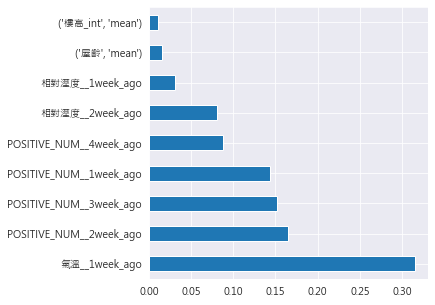

In [229]:
#feature importance
f, ax = plt.subplots(figsize=(5,5))
ff=ddf_new.drop(["POSITIVE_NUM"],axis=1)
(pd.Series(grid_search.best_estimator_.feature_importances_, index=ff.columns)
   .nlargest(ddf_new.shape[1])
   .plot(kind='barh'))

In [230]:
true_data = pd.DataFrame(data = y_test)

predictions_data = pd.DataFrame(data = prediction)

combined = predictions_data
combined['Actual'] = true_data[0]
combined.rename(columns = {0: 'Predicted'}, inplace = True)
#random_combined = combined.sample(n=250, random_state=100)
#random_combined.head(20)
combined

,Predicted,Actual
0,4.137588,6
1,4.620101,4
2,4.901257,4
3,3.738362,3
4,4.068710,2
...,...,...
1773,4.924551,5
1774,3.976055,3
1775,4.806779,4
1776,4.481737,7


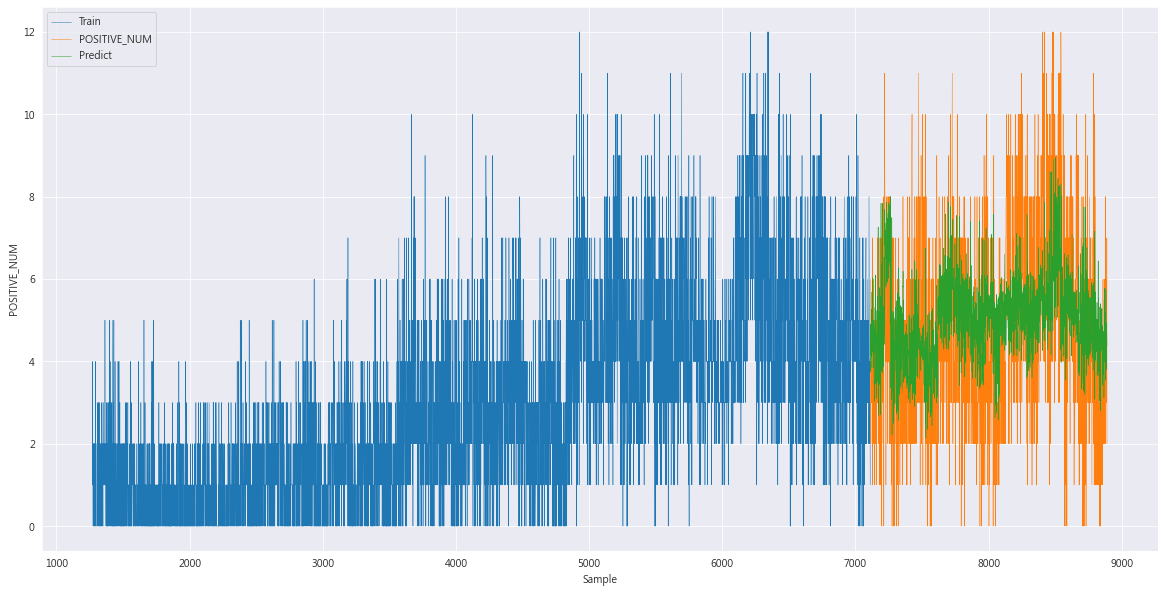

In [169]:
f, ax = plt.subplots(figsize=(20,10))
train_df=ddf_new[:train_ds_size]
test_df=ddf_new[train_ds_size:]
test_df=test_df.assign(Predict=prediction)

plt.xlabel("Sample")
plt.ylabel("POSITIVE_NUM")
plt.plot(train_df["POSITIVE_NUM"],linewidth=0.5,label="Train")
plt.plot(test_df["POSITIVE_NUM"],linewidth=0.5,label="POSITIVE_NUM")
plt.plot(test_df["Predict"],linewidth=0.5,label="Predict")
plt.legend()
plt.show()

#f.savefig("plot.png")

## 預測上升或下降

In [231]:
updown=np.zeros((7*254,2))
updown=pd.DataFrame(updown)
updown.rename(columns={0:"Predicted",1:"Actual"},inplace=True)
updown=updown.astype(int)

In [232]:
for i in range(0,len(combined)):
    if combined["Predicted"][i]<c["True"][i+s-254]:
        updown["Predicted"][i]=0#down
    else:
        updown["Predicted"][i]=1#up 
    if combined["Actual"][i]<c["True"][i+s-254]:
        updown["Actual"][i]=0#down
    else:
        updown["Actual"][i]=1#up 

In [233]:
y_test=updown["Actual"]
y_pred=updown["Predicted"]

準確性：72.27%
精確率：71.04%
F1分數：71.12%
召回率：71.21%
{0: 703, 1: 1075}


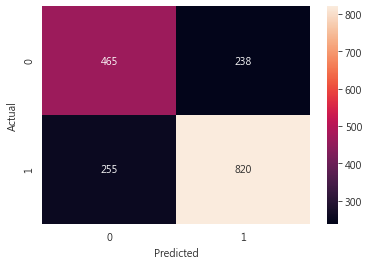

Class: 0
Number of Wrong Prediction: 255 out of 720
Percentage of True Prediction: 64.58%
***********************************************************
Class: 1
Number of Wrong Prediction: 238 out of 1058
Percentage of True Prediction: 77.50%
***********************************************************


In [234]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
print(f'準確性：{accuracy * 100:.2f}%')

# 計算精確率
precision = precision_score(y_test, y_pred, average='macro')
print(f'精確率：{precision * 100:.2f}%')

# 計算F1分數
f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1分數：{f1 * 100:.2f}%')

# 計算召回率
recall = recall_score(y_test, y_pred, average='macro')
print(f'召回率：{recall * 100:.2f}%')

def plot_confusion_matrix(actual_val, pred_val, title=None):
    confusion_matrix = pd.crosstab(actual_val, pred_val,
                                   rownames=['Actual'],
                                   colnames=['Predicted'])

    plot = sns.heatmap(confusion_matrix, annot=True, fmt=',.0f')

    if title is None:
        pass
    else:
        plot.set_title(title)

    plt.show()
    for i in range(len(confusion_matrix)):
     print("Class:",str(i))
     print("Number of Wrong Prediction:", str(sum(confusion_matrix[i])-confusion_matrix[i][i]), f"out of {sum(confusion_matrix[i])}")
     print("Percentage of True Prediction: {:.2f}%".format(confusion_matrix[i][i]*100 / sum(confusion_matrix[i])))
     print("***********************************************************")

# 看資料內各分類的總筆數
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))

# 畫confusion matrix
plot_confusion_matrix(y_test,np.array(y_pred))

## 前一周陽性數baseline

In [235]:
ddf_new

,POSITIVE_NUM,"('屋齡', 'mean')","('樓高_int', 'mean')",POSITIVE_NUM__1week_ago,POSITIVE_NUM__2week_ago,POSITIVE_NUM__3week_ago,POSITIVE_NUM__4week_ago,氣溫__1week_ago,相對溼度__1week_ago,相對溼度__2week_ago
1270,1,34.884615,4.961538,0,2,3,2,21.357143,80.428571,70.857143
1271,1,19.735294,7.176471,0,3,1,1,21.357143,80.428571,70.857143
1272,4,22.750000,4.375000,1,2,3,2,21.357143,80.428571,70.857143
1273,1,32.806452,5.258065,1,2,6,1,21.357143,80.428571,70.857143
1274,1,31.285714,6.285714,0,1,3,2,21.357143,80.428571,70.857143
...,...,...,...,...,...,...,...,...,...,...
8885,5,17.782609,3.956522,7,6,4,6,28.957143,84.285714,77.714286
8886,3,34.409091,4.863636,4,3,4,4,28.957143,84.285714,77.714286
8887,4,22.666667,5.238095,8,6,2,5,28.957143,84.285714,77.714286
8888,7,11.483871,7.935484,7,5,3,3,28.957143,84.285714,77.714286


In [249]:
yy = ddf_new["POSITIVE_NUM"].values
yy_previous = ddf_new["POSITIVE_NUM__1week_ago"].values

In [250]:
train_ds_size=5842

y_base,y_test=yy_previous[train_ds_size:],yy[train_ds_size:]

In [238]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,\
  mean_squared_error

def evaluate_model(y_test, y_base):
  print(f"MAE: {mean_absolute_error(y_test, y_base)}")
  print(f"MSE: {mean_squared_error(y_test, y_base)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, y_base)}")

evaluate_model(y_test, y_base)

MAE: 1.905511811023622
MSE: 6.246344206974128
MAPE: 169708197431847.1


In [239]:
test_y_no0=[]
preds_no0=[]
for i in range(0,len(y_test)):
    if y_test[i]!=0:
        test_y_no0.append(y_test[i])
        preds_no0.append(y_base[i]) 

In [240]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,\
  mean_squared_error

def evaluate_model(y_test, prediction):
  print(f"MAE: {mean_absolute_error(y_test, prediction)}")
  print(f"MSE: {mean_squared_error(y_test, prediction)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")

evaluate_model(test_y_no0, preds_no0)

MAE: 1.8977142857142857
MSE: 6.177714285714286
MAPE: 0.5378471449185734


In [34]:
y_test[1500:]

array([0, 1, 3, 3, 4, 1, 1, 6, 2, 4, 0, 0, 0, 1, 1, 3, 2, 1, 2, 2, 0, 3,
       5, 2, 4, 0, 4, 3, 0, 1, 0, 1, 3, 2, 2, 0, 2, 2, 2, 2, 3, 2, 0, 1,
       2, 4, 6, 2, 2, 1, 2, 1, 2, 2, 1, 4, 1, 2, 1, 2, 2, 1, 2, 2, 0, 2,
       1, 2, 1, 1, 0, 1, 0, 2, 2, 3, 1, 0, 2, 0, 2, 2, 0, 3, 1, 1, 3, 0,
       0, 2, 2, 3, 0, 2, 1, 2, 0, 2, 1, 2, 5, 4, 3, 0, 2, 1, 4, 1, 1, 1,
       2, 0, 1, 1, 1, 2, 1, 0, 5, 1, 4, 5, 1, 4, 0, 1, 0, 5, 1, 1, 3, 5,
       2, 1, 0, 2, 2, 4, 2, 1, 1, 2, 1, 4, 0, 1, 1, 1, 2, 4, 3, 4, 0, 0,
       2, 1, 2, 1, 1, 1, 2, 2, 2, 3, 1, 0, 2, 2, 0, 0, 2, 1, 7, 1, 2, 2,
       2, 3, 1, 1, 3, 0, 2, 1, 0, 5, 4, 0, 1, 1, 2, 2, 1, 1, 0, 0, 0, 1,
       2, 0, 3, 0, 4, 0, 0, 2, 0, 0, 1, 1, 1, 3, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 4, 2, 1, 0, 1, 0, 4, 1, 1, 3, 3, 7,
       0, 0, 3, 5, 3, 2, 0, 4, 2, 1, 3, 0, 0, 0, 1, 3, 4, 0, 0, 1, 3, 2,
       2, 0, 0, 0, 3, 3, 2, 3, 0, 1, 0, 4, 7, 3], dtype=int64)

In [35]:
y_base[1500:]

array([0, 1, 3, 1, 5, 2, 2, 4, 3, 3, 3, 3, 2, 2, 3, 4, 4, 4, 1, 4, 1, 2,
       5, 2, 4, 1, 2, 0, 3, 2, 4, 2, 4, 1, 3, 1, 3, 2, 4, 2, 2, 3, 2, 1,
       3, 0, 3, 3, 3, 2, 1, 1, 0, 0, 1, 2, 1, 0, 2, 4, 0, 1, 2, 3, 1, 1,
       0, 3, 1, 3, 0, 1, 2, 1, 1, 3, 1, 2, 1, 0, 0, 1, 1, 3, 1, 0, 2, 0,
       2, 3, 3, 0, 2, 2, 1, 4, 0, 2, 3, 3, 5, 5, 1, 1, 1, 3, 5, 0, 3, 1,
       1, 1, 2, 1, 0, 1, 1, 0, 5, 2, 6, 4, 1, 5, 1, 0, 2, 4, 1, 2, 3, 5,
       4, 1, 1, 2, 2, 4, 1, 2, 3, 3, 2, 0, 0, 1, 0, 1, 2, 4, 3, 5, 1, 0,
       4, 2, 1, 1, 1, 1, 3, 3, 2, 4, 0, 3, 3, 3, 1, 2, 4, 4, 3, 1, 2, 3,
       4, 2, 1, 2, 5, 0, 2, 2, 0, 3, 4, 1, 0, 2, 2, 1, 0, 1, 3, 2, 0, 2,
       0, 1, 2, 1, 2, 0, 1, 2, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 2, 2, 0, 0,
       2, 0, 0, 4, 3, 2, 0, 1, 0, 0, 1, 2, 0, 0, 1, 2, 6, 1, 2, 3, 3, 4,
       0, 1, 2, 4, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 3, 3, 4, 1, 1, 6, 2, 4,
       0, 0, 0, 1, 1, 3, 2, 1, 2, 2, 0, 3, 5, 2], dtype=int64)

In [256]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_mean = np.mean(yy)  # 使用平均數
y_median = np.median(yy)  # 使用中位數

y_pred_baseline_mean = np.full_like(y_test, y_mean,dtype=float)
y_pred_baseline_median = np.full_like(y_test, y_median)


test_y_no0=[]
preds_no0=[]
for i in range(0,len(y_test)):
    if y_test[i]!=0:
        test_y_no0.append(y_test[i])
        preds_no0.append(y_pred_baseline_mean[i]) #y_pred_baseline_mean,y_pred_baseline_median

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,\
  mean_squared_error

def evaluate_model(y_test, prediction):
  print(f"MAE: {mean_absolute_error(y_test, prediction)}")
  print(f"MSE: {mean_squared_error(y_test, prediction)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")

evaluate_model(test_y_no0, preds_no0)

MAE: 2.1602861642294715
MSE: 7.860737740361194
MAPE: 0.46427553021781376


In [257]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_mean = np.mean(yy)  # 使用平均數
y_median = np.median(yy)  # 使用中位數

y_pred_baseline_mean = np.full_like(y_test, y_mean)
y_pred_baseline_median = np.full_like(y_test, y_median)


test_y_no0=[]
preds_no0=[]
for i in range(0,len(y_test)):
    if y_test[i]!=0:
        test_y_no0.append(y_test[i])
        preds_no0.append(y_pred_baseline_median[i]) #y_pred_baseline_mean,y_pred_baseline_median

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,\
  mean_squared_error

def evaluate_model(y_test, prediction):
  print(f"MAE: {mean_absolute_error(y_test, prediction)}")
  print(f"MSE: {mean_squared_error(y_test, prediction)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")

evaluate_model(test_y_no0, preds_no0)

MAE: 2.250857142857143
MSE: 8.721714285714286
MAPE: 0.4565406307977737


In [259]:
updown=np.zeros((7*254,2))
updown=pd.DataFrame(updown)
updown.rename(columns={0:"Predicted",1:"Actual"},inplace=True)
updown=updown.astype(int)

In [261]:
for i in range(0,len(combined)):
    if y_pred_baseline_mean[i]<c["True"][i+s-254]:
        updown["Predicted"][i]=0#down
    else:
        updown["Predicted"][i]=1#up 
    if combined["Actual"][i]<c["True"][i+s-254]:
        updown["Actual"][i]=0#down
    else:
        updown["Actual"][i]=1#up 

In [262]:
y_test=updown["Actual"]
y_pred=updown["Predicted"]

準確性：61.25%
精確率：66.93%
F1分數：61.06%
召回率：65.57%
{0: 703, 1: 1075}


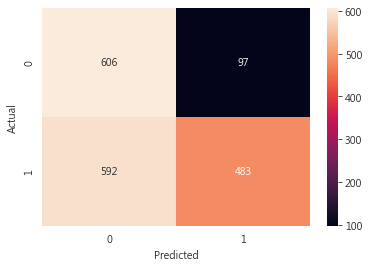

Class: 0
Number of Wrong Prediction: 592 out of 1198
Percentage of True Prediction: 50.58%
***********************************************************
Class: 1
Number of Wrong Prediction: 97 out of 580
Percentage of True Prediction: 83.28%
***********************************************************


In [263]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
print(f'準確性：{accuracy * 100:.2f}%')

# 計算精確率
precision = precision_score(y_test, y_pred, average='macro')
print(f'精確率：{precision * 100:.2f}%')

# 計算F1分數
f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1分數：{f1 * 100:.2f}%')

# 計算召回率
recall = recall_score(y_test, y_pred, average='macro')
print(f'召回率：{recall * 100:.2f}%')

def plot_confusion_matrix(actual_val, pred_val, title=None):
    confusion_matrix = pd.crosstab(actual_val, pred_val,
                                   rownames=['Actual'],
                                   colnames=['Predicted'])

    plot = sns.heatmap(confusion_matrix, annot=True, fmt=',.0f')

    if title is None:
        pass
    else:
        plot.set_title(title)

    plt.show()
    for i in range(len(confusion_matrix)):
     print("Class:",str(i))
     print("Number of Wrong Prediction:", str(sum(confusion_matrix[i])-confusion_matrix[i][i]), f"out of {sum(confusion_matrix[i])}")
     print("Percentage of True Prediction: {:.2f}%".format(confusion_matrix[i][i]*100 / sum(confusion_matrix[i])))
     print("***********************************************************")

# 看資料內各分類的總筆數
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))

# 畫confusion matrix
plot_confusion_matrix(y_test,np.array(y_pred))

## 其他model

In [148]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [153]:
from sklearn import linear_model
clf=linear_model.PoissonRegressor()

clf.fit(x_train, y_train )

PoissonRegressor()

In [157]:
# Lasso Regression
import pandas
from numpy import absolute
from numpy import mean
from numpy import std

from sklearn import model_selection # CV
from sklearn.linear_model import Lasso

lasso = Lasso() # defualt alpha=1.0
lasso.fit(x_train, y_train)

Lasso()

In [158]:
prediction = lasso.predict(x_test)
#plot_predictions(testing_dates, Y_test, prediction)
evaluate_model(y_test, prediction)

MAE: 2.471299109264885
MSE: 10.025488509310353
MAPE: 176114553907353.88


In [159]:
test_y_no0=[]
preds_no0=[]
for i in range(0,len(y_test)):
    if y_test[i]!=0:
        test_y_no0.append(y_test[i])
        preds_no0.append(prediction[i]) 

In [160]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,\
  mean_squared_error

def evaluate_model(y_test, prediction):
  print(f"MAE: {mean_absolute_error(y_test, prediction)}")
  print(f"MSE: {mean_squared_error(y_test, prediction)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")

evaluate_model(test_y_no0, preds_no0)

MAE: 2.4661765707430283
MSE: 10.05303667590591
MAPE: 0.47773561315833724
